In [1]:
# %load_ext autoreload
# %autoreload 2
# %cd /home/ezrae/Evolution-of-Statistical-Induction-Heads
import training_pipeline
import datasets
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import graphing_pipeline
import test_error
import utils
import importlib
from mingpt.utils import set_seed
sns.set_context("paper", font_scale=1.5)
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# training_pipeline.device = "cpu"
device = training_pipeline.device

conf = training_pipeline.get_default_config()
histories = []
datem = []
bigram_data = []
unigram_data = []
seeds = [0]
path = "blog"
def get_test_sets(config):
  bigram_dataset = datasets.doubly_stochastic('test', config.block_size+1, num_symbols = config.vocab_size,)
  unigram_dataset = datasets.unigram('test', config.block_size+1, num_symbols=config.vocab_size)
  
  return bigram_dataset, unigram_dataset

n=5
Loading cached transition matrices from train_transition_size=1000/transitions_n5_s2.pt
Loading cached transition matrices from test_transition_size=10000000/transitions_n5_s2.pt
config seed: 0
number of parameters: 46336
running on device cpu
iter_dt 0.00 ms; iter 0: train loss 0.691901
iter_dt 31.81 ms; iter 2000: train loss 0.653905
iter_dt 33.44 ms; iter 4000: train loss 0.631272
iter_dt 32.20 ms; iter 6000: train loss 0.601025
iter_dt 31.55 ms; iter 8000: train loss 0.625163


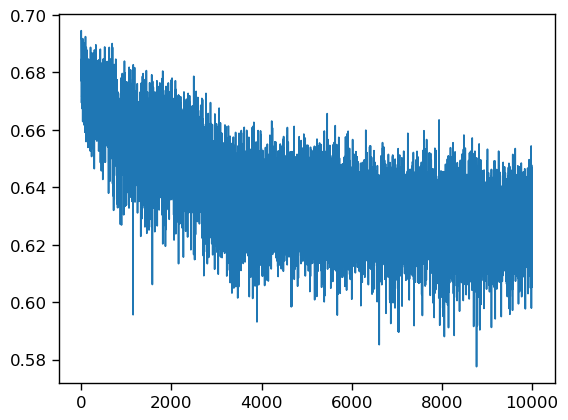

len(datem[-1][1]): 7


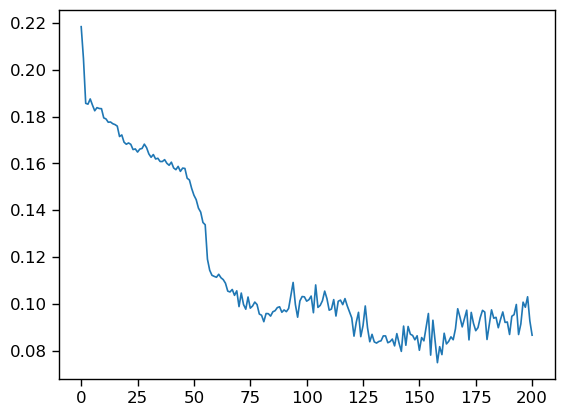

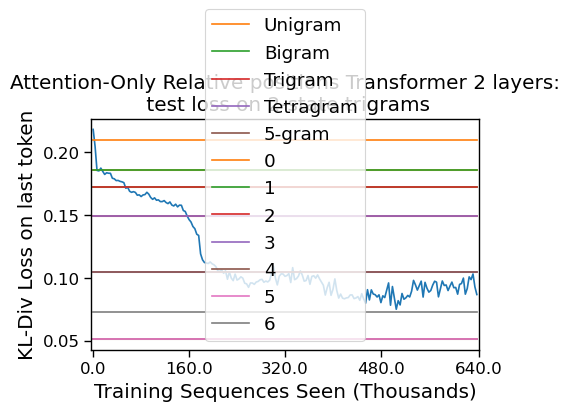

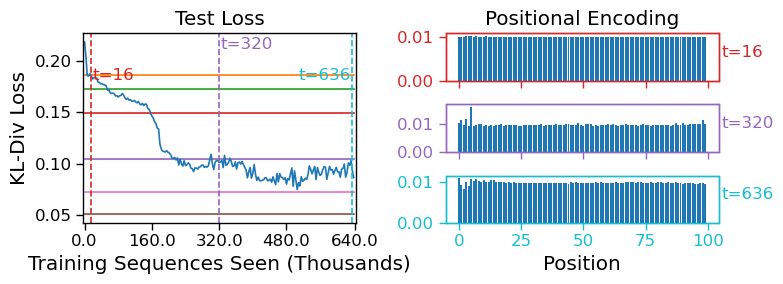

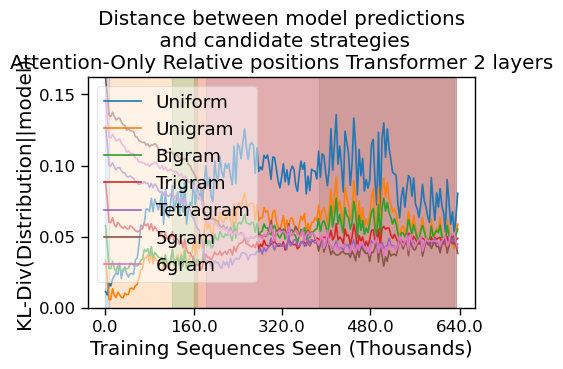

In [ ]:
# Use mixture_parallel to generate training samples, draw from pure 5-gram
# Test on 5-gram model

n = 5
from torch.profiler import profile, record_function, ProfilerActivity

# from datasets import ngrams
conf = training_pipeline.get_default_config()
histories, datem, bigram_data, unigram_data = [], [], [], []
# conf.model_type = f'one head (attention only, corrected rel pos)'
# conf.model_type = "transformer"
conf.model_type = 'Attention-Only Relative positions Transformer'
print(f"n={n}")
conf.vocab_size = 2
conf.n_head = n - 1
conf.n_embd = 16 * conf.n_head #* 3
conf.n_layer = 2
conf.max_iters = 10000
conf.n = n
conf.block_size = 100
conf.batch_size = 64
conf.num_workers = 6
# conf.learning_rate = 4e-3
conf.learning_rate = 5e-4
conf.dataset = datasets.ngrams('train', n, conf.block_size+1, conf.vocab_size, last_token_only=False)
name = f"{conf.vocab_size}transformer_symb_{n}gram"
test_dataset = datasets.ngrams('test', n, conf.block_size+1, conf.vocab_size, size = int(1e7))
# if conf.vocab_size < 4 and conf.n == 2:
#     bigram_dataset, unigram_dataset = get_test_sets(conf)
for seed in seeds:
    conf.seed = seed
    set_seed(seed)
    model_history, train_loss = training_pipeline.train(conf) 
    histories.append(model_history)

plt.plot(train_loss)
plt.show()

test_ngrams = 5
for model_history in histories:
    data = test_error.test_last_token(model_history, test_dataset, device, max_ngrams = test_ngrams)
    datem.append(data)
    
    plt.plot(datem[-1][0])
    # if conf.vocab_size < 4 and conf.n == 2:
    #     data = test_error.test_last_token(model_history, bigram_dataset, device, max_ngrams = test_ngrams)
    #     bigram_data.append(data)
    #     data = test_error.test_last_token(model_history, unigram_dataset, device, max_ngrams = test_ngrams)
    #     unigram_data.append(data)

axes = graphing_pipeline.test_loss(datem, conf) 
plt.legend()
# plt.savefig(f"{path}/{name}_test_loss.pdf", format='pdf', bbox_inches='tight')
for lab, i in enumerate(datem[-1][1]):
    plt.plot((i,)*len(datem[-1][0]), label = f"{lab}")
plt.legend()
# plt.show()

fig, axes = graphing_pipeline.pos_encode_graph(model_history, datem, conf)
# plt.savefig(f"{path}/{name}_pos.pdf", format='pdf', bbox_inches='tight')
plt.show() 
# if conf.vocab_size < 4 and conf.n == 2:
#     fig, axes = graphing_pipeline.out_of_distribution(datem, unigram_data, bigram_data, conf)
#     # plt.savefig(f"{path}/{name}_loss.pdf", format='pdf', bbox_inches='tight')
#     plt.show()
axes = graphing_pipeline.similarity(datem, conf)
# plt.savefig(f"{path}/{name}_similarity.pdf", format='pdf', bbox_inches='tight')
plt.show()

n=3
Loading cached transition matrices from train_transition_size=1000/transitions_n2_s2.pt
Loading cached transition matrices from train_transition_size=1000/transitions_n3_s2.pt
Loading cached transition matrices from train_transition_size=1000/transitions_n2_s2.pt
Loading cached transition matrices from test_transition_size=10000000/transitions_n3_s2.pt
config seed: 0
number of parameters: 14976
running on device cpu
iter_dt 0.00 ms; iter 0: train loss 0.699352
iter_dt 19.17 ms; iter 400: train loss 0.606208
iter_dt 17.25 ms; iter 800: train loss 0.599080
iter_dt 19.37 ms; iter 1200: train loss 0.588506
iter_dt 16.26 ms; iter 1600: train loss 0.564797


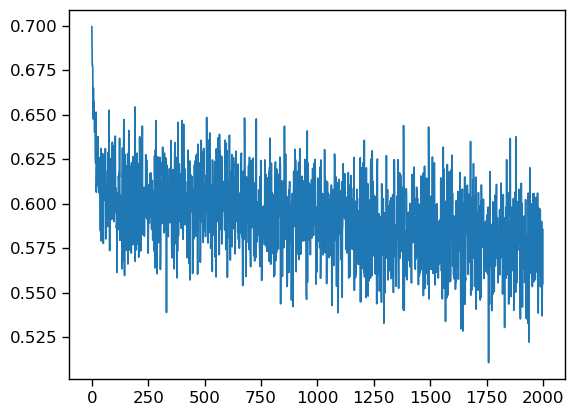

len(datem[-1][1]): 5


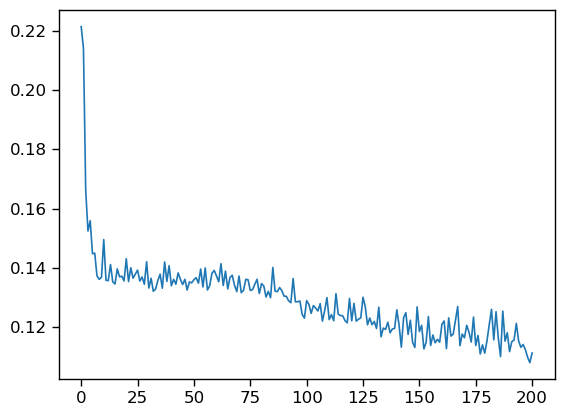

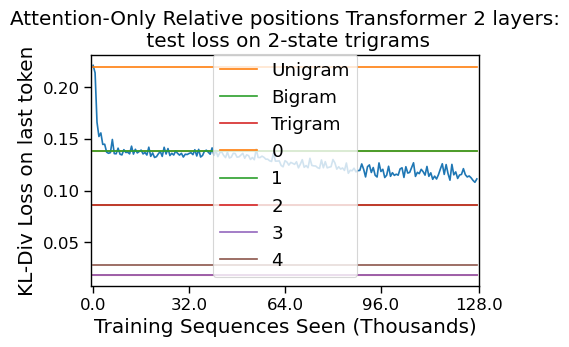

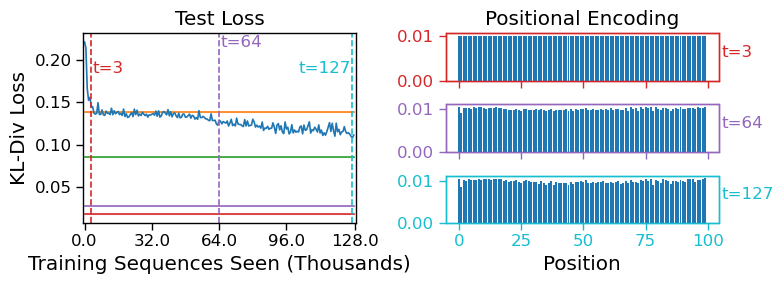

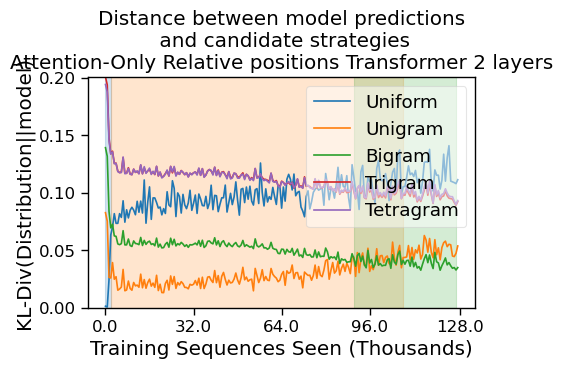

In [ ]:
# Use mixture_parallel to generate training samples, draw from input dblist wrt fixed ratios 40% unigram, 35% 3-gram, 25% 2-gram
# Test on 3-gram model
n = 3
from torch.profiler import profile, record_function, ProfilerActivity

# from datasets import ngrams
conf = training_pipeline.get_default_config()
histories, datem, bigram_data, unigram_data = [], [], [], []
# conf.model_type = f'one head (attention only, corrected rel pos)'
# conf.model_type = "transformer"
conf.model_type = 'Attention-Only Relative positions Transformer'
print(f"n={n}")
conf.vocab_size = 2
conf.n_head = n - 1
conf.n_embd = 16 * conf.n_head #* 3
conf.n_layer = 2
conf.max_iters = 2000
conf.n = n
conf.block_size = 100
conf.batch_size = 64
conf.num_workers = 6
# conf.learning_rate = 4e-3
conf.learning_rate = 5e-4
total_train_size = 1000
proportions = [0.4, 0.35, 0.25]
db1 = datasets.unigram('train', conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size)
db2 = datasets.ngrams('train', 3, conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size)
db3 = datasets.ngrams('train', 2, conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size)
mix = datasets.mixture_parallel([db1, db2, db3], proportions)
conf.dataset = mix
name = f"{conf.vocab_size}transformer_symb_{n}gram"
test_dataset = datasets.ngrams('test', n, conf.block_size+1, conf.vocab_size, size = int(1e7))
if conf.vocab_size < 4 and conf.n == 2:
    bigram_dataset, unigram_dataset = get_test_sets(conf)
for seed in seeds:
    conf.seed = seed
    set_seed(seed)
    model_history, train_loss = training_pipeline.train(conf) 
    histories.append(model_history)

plt.plot(train_loss)
plt.show()

test_ngrams = 3
for model_history in histories:
    data = test_error.test_last_token(model_history, test_dataset, device, max_ngrams = test_ngrams)
    datem.append(data)
    
    plt.plot(datem[-1][0])
    if conf.vocab_size < 4 and conf.n == 2:
        data = test_error.test_last_token(model_history, bigram_dataset, device, max_ngrams = test_ngrams)
        bigram_data.append(data)
        data = test_error.test_last_token(model_history, unigram_dataset, device, max_ngrams = test_ngrams)
        unigram_data.append(data)

axes = graphing_pipeline.test_loss(datem, conf) 
plt.legend()
# plt.savefig(f"{path}/{name}_test_loss.pdf", format='pdf', bbox_inches='tight')
for lab, i in enumerate(datem[-1][1]):
    plt.plot((i,)*len(datem[-1][0]), label = f"{lab}")
plt.legend()
# plt.show()

fig, axes = graphing_pipeline.pos_encode_graph(model_history, datem, conf)
# plt.savefig(f"{path}/{name}_pos.pdf", format='pdf', bbox_inches='tight')
plt.show() 
if conf.vocab_size < 4 and conf.n == 2:
    fig, axes = graphing_pipeline.out_of_distribution(datem, unigram_data, bigram_data, conf)
    # plt.savefig(f"{path}/{name}_loss.pdf", format='pdf', bbox_inches='tight')
    plt.show()
axes = graphing_pipeline.similarity(datem, conf)
# plt.savefig(f"{path}/{name}_similarity.pdf", format='pdf', bbox_inches='tight')
plt.show()

n=7
Loading cached transition matrices from train_transition_size=1000/transitions_n2_s2.pt
Loading cached transition matrices from train_transition_size=1000/transitions_n5_s2.pt
Loading cached transition matrices from train_transition_size=1000/transitions_n7_s2.pt
Loading cached transition matrices from test_transition_size=10000000/transitions_n7_s2.pt
config seed: 0
number of parameters: 94080
running on device cpu
iter_dt 0.00 ms; iter 0: train loss 0.686279
iter_dt 47.78 ms; iter 1200: train loss 0.635140
iter_dt 52.78 ms; iter 2400: train loss 0.596235
iter_dt 48.48 ms; iter 3600: train loss 0.631941
iter_dt 50.47 ms; iter 4800: train loss 0.595185


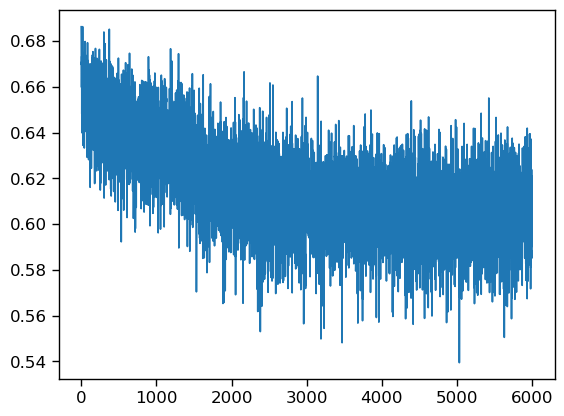

len(datem[-1][1]): 9


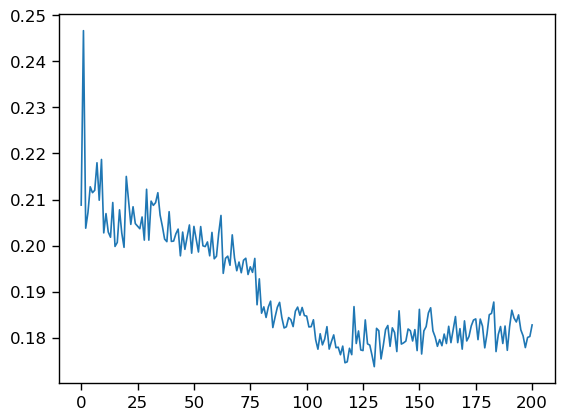

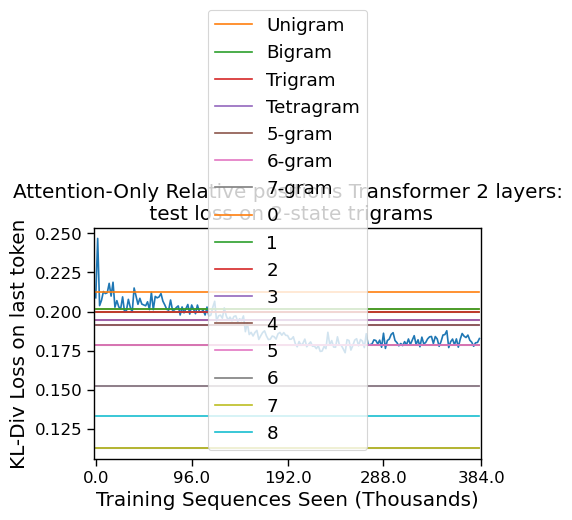

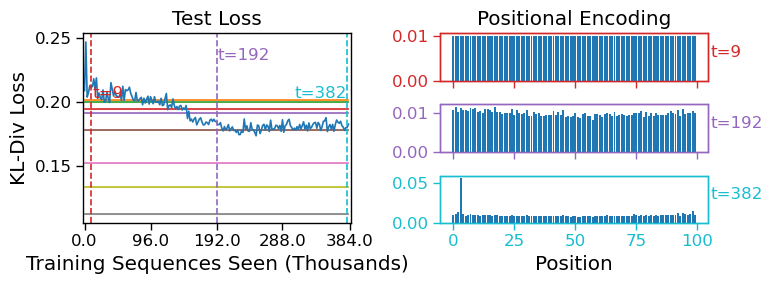

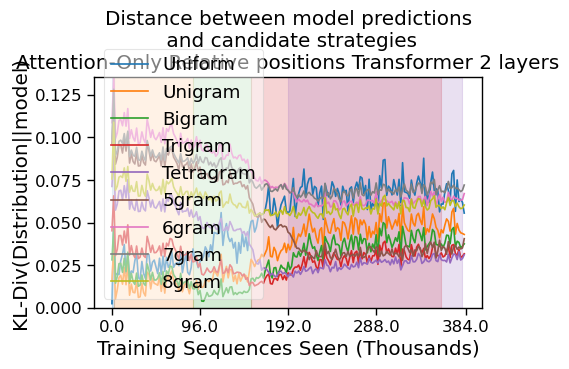

In [ ]:
## Use mixture_parallel to generate training sample sequence parallel, draw from input dblist wrt fixed ratios 40% unigram, 35% 5-gram, 25% 7-gram
## Test on 7-gram model

n = 7
from torch.profiler import profile, record_function, ProfilerActivity

# from datasets import ngrams
conf = training_pipeline.get_default_config()
histories, datem, bigram_data, unigram_data = [], [], [], []
# conf.model_type = f'one head (attention only, corrected rel pos)'
# conf.model_type = "transformer"
conf.model_type = 'Attention-Only Relative positions Transformer'
print(f"n={n}")
conf.vocab_size = 2
conf.n_head = n - 1
conf.n_embd = 16 * conf.n_head #* 3
conf.n_layer = 2
conf.max_iters = 6000
conf.n = n
conf.block_size = 100
conf.batch_size = 64
conf.num_workers = 6
# conf.learning_rate = 4e-3
conf.learning_rate = 5e-4
total_train_size = 1000
proportions = [0.4, 0.35, 0.25]
db1 = datasets.unigram('train', conf.block_size+1, conf.vocab_size, last_token_only=False, size =total_train_size)
db2 = datasets.ngrams('train', 5, conf.block_size+1, conf.vocab_size, last_token_only=False, size=total_train_size)
db3 = datasets.ngrams('train', 7, conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size)
mix = datasets.mixture_parallel([db1, db2, db3], proportions)
# if want to sample wrt probability instead of fixed ratio
# db1 = datasets.unigram('train', conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size)
# db2 = datasets.ngrams('train', 3, conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size, sequential=True)
# db3 = datasets.ngrams('train', 2, conf.block_size+1, conf.vocab_size, last_token_only=False, size = total_train_size, sequential=True)   
# mix = datasets.mixture_sequential([db1, db2, db3], proportions) 
conf.dataset = mix
name = f"{conf.vocab_size}transformer_symb_{n}gram"
test_dataset = datasets.ngrams('test', n, conf.block_size+1, conf.vocab_size, size = int(1e7))
if conf.vocab_size < 4 and conf.n == 2:
    bigram_dataset, unigram_dataset = get_test_sets(conf)
for seed in seeds:
    conf.seed = seed
    set_seed(seed)
    model_history, train_loss = training_pipeline.train(conf) 
    histories.append(model_history)

plt.plot(train_loss)
plt.show()

test_ngrams = 7
for model_history in histories:
    data = test_error.test_last_token(model_history, test_dataset, device, max_ngrams = test_ngrams)
    datem.append(data)
    
    plt.plot(datem[-1][0])
    if conf.vocab_size < 4 and conf.n == 2:
        data = test_error.test_last_token(model_history, bigram_dataset, device, max_ngrams = test_ngrams)
        bigram_data.append(data)
        data = test_error.test_last_token(model_history, unigram_dataset, device, max_ngrams = test_ngrams)
        unigram_data.append(data)

axes = graphing_pipeline.test_loss(datem, conf) 
plt.legend()
# plt.savefig(f"{path}/{name}_test_loss.pdf", format='pdf', bbox_inches='tight')
for lab, i in enumerate(datem[-1][1]):
    plt.plot((i,)*len(datem[-1][0]), label = f"{lab}")
plt.legend()
# plt.show()

fig, axes = graphing_pipeline.pos_encode_graph(model_history, datem, conf)
# plt.savefig(f"{path}/{name}_pos.pdf", format='pdf', bbox_inches='tight')
plt.show() 
if conf.vocab_size < 4 and conf.n == 2:
    fig, axes = graphing_pipeline.out_of_distribution(datem, unigram_data, bigram_data, conf)
    # plt.savefig(f"{path}/{name}_loss.pdf", format='pdf', bbox_inches='tight')
    plt.show()
axes = graphing_pipeline.similarity(datem, conf)
# plt.savefig(f"{path}/{name}_similarity.pdf", format='pdf', bbox_inches='tight')
plt.show()

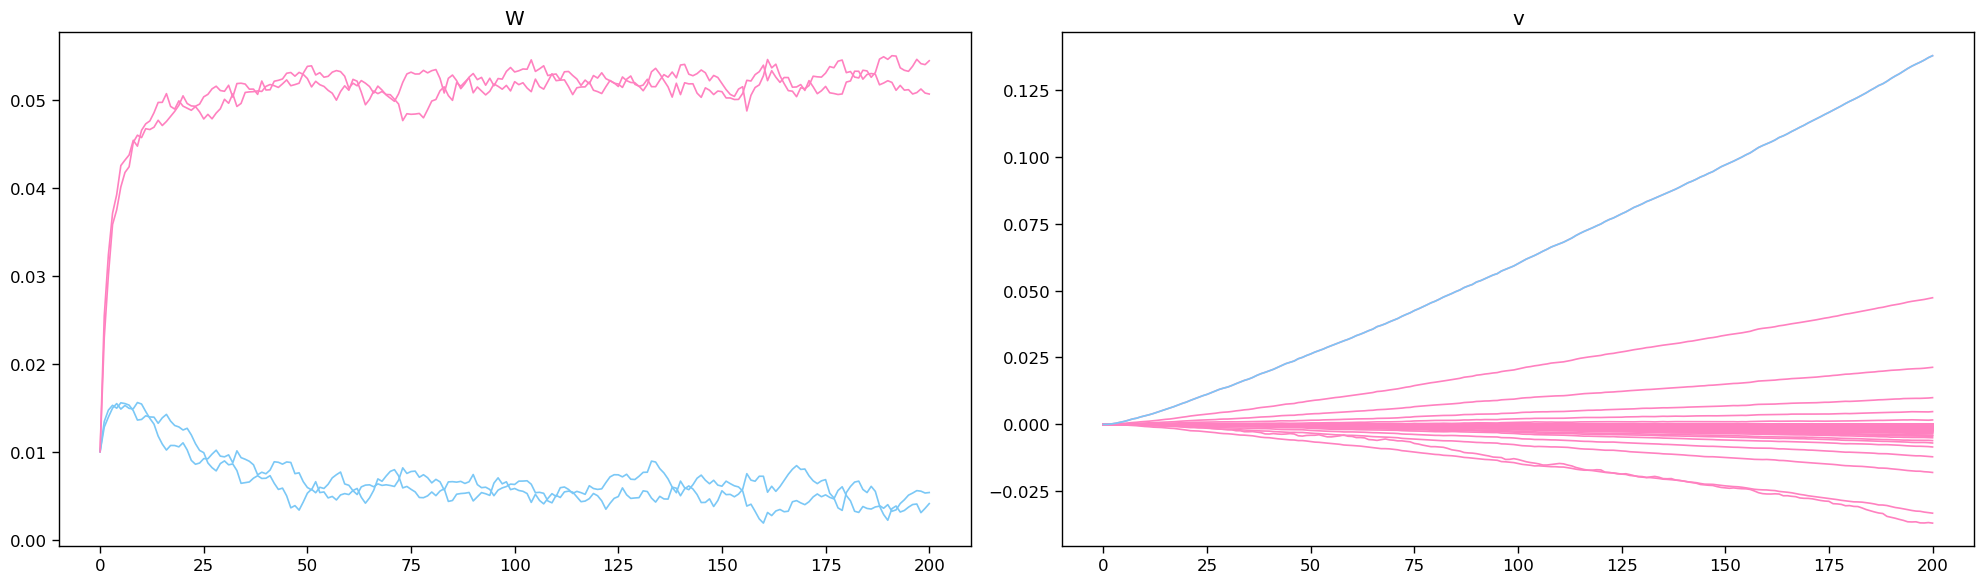

tensor([[-0.0369],
        [ 0.1377]], requires_grad=True)
Parameter containing:
tensor([[0.0507, 0.0053],
        [0.0041, 0.0545]], requires_grad=True)


In [9]:
model = histories[-1][-1]
with torch.no_grad():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    # axs[0].plot([(m.Wq.weight.trace()/m.Wq.weight.sum()).cpu() for m in histories[-1]])

    for i in range(conf.vocab_size):
        for j in range(conf.vocab_size):
                if i == j:
                    continue
                axs[0].plot([(m.W.weight[i,j]).cpu() for m in histories[-1]], color="xkcd:lightblue")
        axs[0].plot([(m.W.weight[i,i]).cpu() for m in histories[-1]], color="xkcd:pink")
                # axs[1].plot([(m.Wv.weight[i,j]-1).cpu() for m in histories[-1]], color="xkcd:lightblue")
    # axs[0].plot([(m.Wq.weight-1).norm(p=1).cpu() for m in histories[-1]], color="xkcd:red")

    axs[0].set_title("W")
    # axs[1].plot([(m.Wv.weight[0,0]).cpu() for m in histories[-1]])
    # axs[1].plot([((m.v.weight[1])*(m.Wq.weight-1).trace()).cpu() for m in histories[-1]])
    # axs[1].set_title("Fraction")
    for i in range(conf.block_size-1, -1, -1):
        axs[-1].plot([(m.v.weight[i]).cpu() for m in histories[-1]], color="xkcd:pink")
    
    axs[-1].plot([(m.v.weight[1]).cpu() for m in histories[-1]], color="xkcd:lightblue")
    # axs[2].plot([m.v.weight.cpu()[1] for m in histories[-1]])
    axs[-1].set_title("v")
    # plt.plot([m.v.weight.cpu()[1]/max(abs(m.v.weight.cpu())) for m in histories[-1]])
    plt.tight_layout()
    plt.show()
    # print(((model.Wv.weight[0,0])).cpu())
    print(((model.v.weight[:2])).cpu())
    print(((histories[-1][-1].W.weight)).cpu())

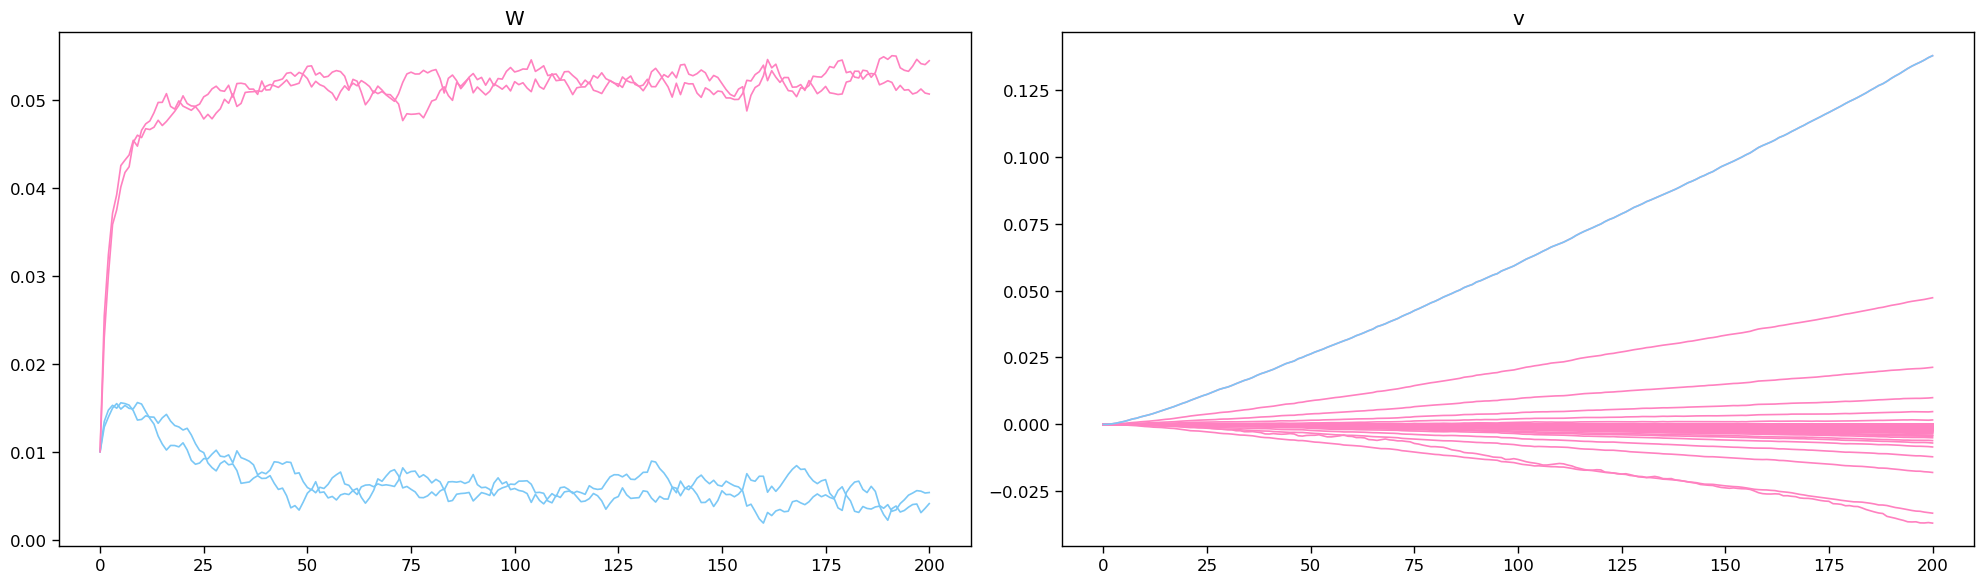

tensor([[-0.0369],
        [ 0.1377]], requires_grad=True)
Parameter containing:
tensor([[0.0507, 0.0053],
        [0.0041, 0.0545]], requires_grad=True)


In [10]:
model = histories[-1][-1]
with torch.no_grad():
    fig, axs = plt.subplots(1, 2, figsize=(20, 6))
    # axs[0].plot([(m.Wq.weight.trace()/m.Wq.weight.sum()).cpu() for m in histories[-1]])

    for i in range(conf.vocab_size):
        for j in range(conf.vocab_size):
                if i == j:
                    continue
                axs[0].plot([(m.W.weight[i,j]).cpu() for m in histories[-1]], color="xkcd:lightblue")
        axs[0].plot([(m.W.weight[i,i]).cpu() for m in histories[-1]], color="xkcd:pink")
                # axs[1].plot([(m.Wv.weight[i,j]-1).cpu() for m in histories[-1]], color="xkcd:lightblue")
    # axs[0].plot([(m.Wq.weight-1).norm(p=1).cpu() for m in histories[-1]], color="xkcd:red")

    axs[0].set_title("W")
    # axs[1].plot([(m.Wv.weight[0,0]).cpu() for m in histories[-1]])
    # axs[1].plot([((m.v.weight[1])*(m.Wq.weight-1).trace()).cpu() for m in histories[-1]])
    # axs[1].set_title("Fraction")
    for i in range(conf.block_size-1, -1, -1):
        axs[-1].plot([(m.v.weight[i]).cpu() for m in histories[-1]], color="xkcd:pink")
    
    axs[-1].plot([(m.v.weight[1]).cpu() for m in histories[-1]], color="xkcd:lightblue")
    # axs[2].plot([m.v.weight.cpu()[1] for m in histories[-1]])
    axs[-1].set_title("v")
    # plt.plot([m.v.weight.cpu()[1]/max(abs(m.v.weight.cpu())) for m in histories[-1]])
    plt.tight_layout()
    plt.show()
    # print(((model.Wv.weight[0,0])).cpu())
    print(((model.v.weight[:2])).cpu())
    print(((histories[-1][-1].W.weight)).cpu())

In [ ]:
# for data in datem:
# #     data = test_error.test_last_token(model_history, test_dataset, device)
# #     datem.append(data)
#     if conf.vocab_size < 4 and conf.n == 2:
#         data = test_error.test_last_token(model_history, bigram_dataset, device)
#         bigram_data.append(data)
#         data = test_error.test_last_token(model_history, unigram_dataset, device)
#         unigram_data.append(data)
# # for i in datem[-1][1]:
# #     plt.plot((i,)*len(datem[-1][0]))
# for lab, i in enumerate(datem[-1][1]):
#     plt.plot((i,)*len(datem[-1][0]), label = f"{lab}")
# plt.legend()
# plt.plot(datem[-1][0])
# plt.show()
# name +="_newmin"
axes = graphing_pipeline.pos_encode_graph(model_history, datem, conf)
plt.savefig(f"{path}/{name}_pos.pdf", format='pdf', bbox_inches='tight')
plt.show()

if conf.vocab_size < 4 and conf.n == 2:
    axes = graphing_pipeline.out_of_distribution(datem, unigram_data, bigram_data, conf)
    plt.savefig(f"{path}/{name}_loss.pdf", format='pdf', bbox_inches='tight')
    plt.show()
axes = graphing_pipeline.similarity(datem, conf)
plt.savefig(f"{path}/{name}_similarity.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
with torch.no_grad():
    tot =0
    for history in histories:
        tot += abs(history[1].v.weight.cpu().numpy())
        # plt.plot(history[1].v.weight.cpu().numpy())
    plt.plot(tot/len(histories))
plt.show()

In [ ]:
model = histories[-1][-1]
with torch.no_grad():
    #increase font size
    plt.rcParams.update({'font.size': 16})
    plt.rcParams['xtick.labelsize']=16
    plt.rcParams['ytick.labelsize']=16
    # idx = torch.tensor([[0,1,2,0]*25]).cuda()
    # print(model(idx)[0][0,-1])
    fig, axs = plt.subplots(1, 2, figsize=(14, 6))
    sns.heatmap((model.Wq.weight).cpu().numpy(), ax=axs[0], square=True)
    axs[0].set_title("W Matrix", fontsize=16)
    # sns.heatmap(model.Wv.weight.cpu().numpy(), ax=axs[1], square=True)
    # axs[1].set_title("Wv")
    axs[1].bar(range(100),height=model.v.weight.cpu().numpy().squeeze())
    axs[1].set_title("v vector", fontsize=16)
    # sns.heatmap(model.layer_two.Wk.weight.cpu().numpy(), ax=axs[1, 2], square=True)
    # axs[1,2].set_title("Layer 2 Wk")

        
    plt.tight_layout()
    plt.savefig(f"{path}/{name}_parameters.pdf", format='pdf', bbox_inches='tight')
    plt.show()

print(model.v.weight)

In [ ]:
n = 5
fig, axs = plt.subplots(n, 2, figsize=(20, 6*n))
with torch.no_grad():
    for i, model in enumerate(histories[-1][:n*4:4]):
        idx = torch.tensor([[0,1,2,0]*25]).cuda()
        print(i)
        sns.heatmap((model.Wq.weight-histories[-1][0].Wq.weight[0,0]).cpu().numpy(), ax=axs[i, 0], square=True)
        axs[i, 0].set_title("Wq")
        # sns.heatmap(model.Wv.weight.cpu().numpy(), ax=axs[i, 1], square=True)
        # axs[i, 1].set_title("Wv")
        axs[i, 1].plot(model.v.weight.cpu().numpy())
        axs[i, 1].set_title("v")
        # sns.heatmap(model.layer_two.Wk.weight.cpu().numpy(), ax=axs[1, 2], square=True)
        # axs[1,2].set_title("Layer 2 Wk")
        
    plt.tight_layout()
    plt.show()

In [ ]:
import numpy as np
# print(np.argmin(datem[-1][0][:24]))
# mini = np.argmin(datem[-1][0][:24])
mini=12
# print(min(datem[-1][0][:24]))
with torch.no_grad():
    # print(model_history[mini].W.weight.cpu())
    print(model_history[1].W.weight.cpu())
    print(model_history[-1].v.weight.sum())
    print(((model_history[-1].v.weight[1])/model_history[-1].v.weight.norm(1)).cpu())
    plt.plot([((m.v.weight[1])/m.v.weight.norm(1)).cpu() for m in model_history])
    plt.sTruehow()
    test = []
    diags = []
    offdiags = []
    for m in model_history:
        tr = m.W.weight.trace()
        diag = tr/conf.vocab_size
        offdiag = (m.W.weight.sum()-tr)/(conf.vocab_size**2-conf.vocab_size)
        diags.append(diag.cpu())
        offdiags.append(offdiag.cpu())

        # test.append((diag/offdiag).cpu())
    plt.plot(diags, label="diagonal")
    plt.plot(offdiags, label="off diagonal")
    plt.legend()
    plt.show()
    # print(f"test: {test[mini]}")
    # plt.plot(model_history[-100].v.weight.cpu())
    # plt.show()

    plt.plot(model_history[0].v.weight.cpu())
    plt.plot(model_history[-1].v.weight.cpu())
    plt.show()

In [ ]:
import copy
m = copy.deepcopy(model_history[-1])
m.v.weight = torch.nn.Parameter(torch.eye(3))


In [ ]:
conf = training_pipeline.get_default_config()
conf.model_type = 'Transformer'
conf.max_iters = 2000
# conf.learning_rate = 1e-2
# conf.learning_rate = 3e-3
conf.vocab_size=3

name = f"{conf.vocab_size}symb_uniformxt"

spectrum_data = graphing_pipeline.mixtures(conf,11)

plt.savefig(f"{path}/{name}_ds_test_loss.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [ ]:

import graphing_pipeline
importlib.reload(graphing_pipeline)
import test_error
importlib.reload(test_error)
# sns.set_palette("colorblind")
# plt.rcParams.update({'font.size': 12})
# points = [5, 145, 190] # 3symb seed 0
# points = [5, 100, 190] # 2symb seed 0
points = [5, 60, 190] # min 3symb seed 0
# points = [5, 15, 190] # min 2symb seed 0

sns.set_context("paper", font_scale=1.5)
import matplotlib
matplotlib.rcParams.update({'xtick.labelsize': 12})

matplotlib.rcParams.update({'ytick.labelsize': 12})

# conf.model_type = 'Transformer Tetragram'
axes = graphing_pipeline.test_loss(datem, conf)
plt.savefig(f"{path}/{name}_loss.pdf", format='pdf', bbox_inches='tight')
plt.show()
axes = graphing_pipeline.similarity(datem, conf)
plt.savefig(f"{path}/{name}_similarity.pdf", format='pdf', bbox_inches='tight')
plt.show()
fig, axes = graphing_pipeline.pos_encode_graph(model_history, datem, conf)
plt.savefig(f"{path}/{name}_pos.pdf", format='pdf', bbox_inches='tight')
plt.show()
# fig, axes = graphing_pipeline.out_of_distribution(datem, unigram_data, bigram_data, conf)
# plt.savefig(f"{path}/{name}_loss.pdf", format='pdf', bbox_inches='tight')
# plt.show()

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
pos_dat = test_error.pos_enc(model_history, conf)
pos_dat = torch.mean(pos_dat, axis=0)
print(pos_dat.shape)
plt.bar(range(conf.block_size), pos_dat[:,70])
plt.savefig(f"test_pos.pdf", format='pdf', bbox_inches='tight')
plt.show()

In [ ]:
importlib.reload(graphing_pipeline)
from random import choices
points = [40, 160, 190]
points = [5, 145, 190]
points = [200]
idx = torch.tensor([list(choices(range(conf.vocab_size), k=15))]).cuda()
unigram = datasets.unigram_3("test", 1, 2, conf.block_size+1, num_symbols=conf.vocab_size)
idx = torch.stack([unigram[0][0][:24]]).to(device)
idx = torch.tensor([[0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2]]).cuda()
# idx = torch.stack([test_dataset[0][0]]).to(device)
print(idx)
# idx = torch.tensor([[0, 0,2,0,0,0,1,0,0, 2,0,0,0,0,0,0, 0,0]]).cuda()

# _= graphing_pipeline.attention(conf, model_history, points, datem[0], idx = idx)
# plt.savefig(f"final/{name}_attn_maps.pdf", format='pdf', bbox_inches='tight')
# plt.plot()
with torch.no_grad():
    for model_history in histories:
        for i in range(conf.vocab_size):
            plt.plot((test_error.pos_enc(model_history, conf)[i][:100,-1]))
        plt.show()
        # graphing_pipeline.attention_at(model_history, points, idx)
        # plt.savefig(f"{path}/{name}_ds_attn.pdf", format='pdf', bbox_inches='tight')
        # plt.show()
        # print(model_history[-1](idx)[0][0][-1])
        # print(model_history[-1].layers[0].wpe.weight.cpu())
    # _= graphing_pipeline.attention(conf, model_history, points, datem[0], idx = idx, layer = 1)

In [ ]:
with torch.no_grad():
    m= model_history[-1]
    num_tokens = conf.vocab_size
    # embds = m.layers[1].ln(m.wte(torch.Tensor(list(range(num_tokens))).long().to(device)).float())
    # sns.heatmap(model_history[-1].layers[1].V(embds).cpu())

    plt.plot(m.layers[0].wpe_k(torch.Tensor(list(range(100))).long().to(device)).float().cpu())

In [ ]:
with torch.no_grad():
    m= model_history[-1]
    num_tokens = conf.vocab_size
    # embds = m.layers[1].ln(m.wte(torch.Tensor(list(range(num_tokens))).long().to(device)).float())
    # sns.heatmap(model_history[-1].layers[1].V(embds).cpu())

    plt.plot(m.layers[0].wpe_v(torch.Tensor(list(range(100))).long().to(device)).float().cpu())

In [ ]:
# idx = torch.tensor([[0, 1, 2, 1, 0, 2, 2, 0, 0, 0, 1, 2, 1, 1, 2]]).cuda()
from random import choices
importlib.reload(graphing_pipeline)
# idx = torch.tensor([[0, 2, 3, 2, 0, 0, 3, 3, 3, 3, 2, 3, 2, 0, 2, 3]], device=device)
# idx = torch.tensor([[0, 2, 3, 2, 0, 2, 3, 3, 3, 3, 2, 3, 2, 0, 2, 3]], device=device)
# idx = torch.tensor([list(choices(range(conf.vocab_size), k=15))]).cuda()
# idx = torch.tensor([[0,1,2]+ [0,0,1]+[1,1,0]+[0,1]], device = device)

x = test_dataset[0]
idx = torch.stack([test_dataset[0][0][:24]]).to(device)
idx = torch.tensor([[0, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1, 0, 1, 0, 0, 0, 2, 0, 0, 0, 0, 2, 1]], device='cuda:0')
if n == 4:
    idx = torch.tensor([[0,0,1,2]+ [0,0,0,1]+[0,0,1,2]+[1,2,0,0]+[0,0,1]], device = device)
FFwriter = matplotlib.animation.FFMpegWriter(fps=20)
with torch.no_grad():
    # animation = graphing_pipeline.animate_attn(conf, model_history, datem[-1], idx)
    animation = graphing_pipeline.animation(conf, model_history, datem[-1], idx)
    

    # animation.save(f'{path}/mc-icl.mp4', writer=FFwriter)
    animation.save(f'{path}/surbhi_tetragrams.mp4', writer=FFwriter)
    plt.show()

In [ ]:
model_history = histories[-1]
from random import choices
with torch.no_grad():
    
    # x = torch.tensor([list(choices(range(conf.vocab_size), k=16))]).to(device)
    # x = torch.tensor([[0,1,2,3,0,1,2,3,0,1,2,3]], device = device)
    # idx = x
    # test_dataset = datasets.ngrams_simple('test', conf.n, conf.block_size+1, conf.vocab_size)
    x = test_dataset[0]
    x = test_dataset[0]
    idx = torch.stack([test_dataset[0][0][:16]]).to(device)
    # idx = torch.tensor([[1, 3, 4, 6, 3, 4, 4, 3, 6, 1, 7, 7, 3, 0, 2, 0, 3, 1, 6, 4, 7, 5, 6, 7]], device='cuda:0')
    print(idx)
    # idx = torch.tensor([[0,1,2]*5+[0,1,0]*2 + [0,0,1]+[1,1,0]+[0,1]], device = device)
    # idx = torch.tensor([[0,1,2]*3+ [0,0,1]+[1,1,0]+[0,1]], device = device)
    # idx = torch.tensor([[0,0,1,2]*3+ [0,0,0,1]+[1,1,1,0]+[0,0,1]], device = device)

    # # idx = torch.tensor([[0,1,2,3,1,1,2,3,0,1,2,3]], device = device)
    # print(idx)
    # graphing_pipeline.multi_head_attention_at(model_history, idx, frame = 120)
    # plt.show()
    # graphing_pipeline.multi_head_attention_at(model_history, idx, frame = 140)
    # plt.show()
    graphing_pipeline.multi_head_attention_at(model_history, idx, frame = 190)
    plt.show()
    